# Ondas propagantes

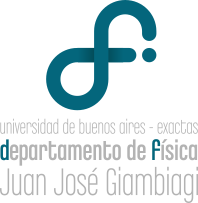  

©2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Ecuación de onda clásica

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

$$
\frac{\partial^2}{\partial t^2} \psi = v^2 \frac{\partial^2}{\partial x^2} \psi,
$$
siendo $v$ la velocidad de propagación. Una solución de esta ecuación es 

In [2]:
t = sym.Symbol('t')
A, k , omega, phi_0 = sym.symbols('A, k , omega, phi_0', positive=True) # parámetros físicos
x = sym.Symbol('x')
psi = sym.Eq(sym.Symbol('\psi'), A* sym.cos(k*x - omega*t + phi_0 ) )
psi

siendo 
- $A$ la amplitud,
- $k$ el número de onda,
- $\omega$ la frecuencia, y
- $\phi_0$ una fase inicial.

Si esta última recibe el mote de inicial, es porque el conjunto recibe el nombre de fase:

In [3]:
phi = sym.Eq(sym.Symbol('\phi'), k* x- omega* t+ phi_0 )
phi

## Onda de propagación

**RE- ESCRIBIR**


Una **onda de propagación**, a veces también llamada _viajera_, es aquella en que se mantiene una $\phi= \mathrm{constante}$.

E.g. puede elegirse tomar de referencia un cresta o pico de esta onda.
Tal máximo de $\xi$ que corresponde a $\phi_\mathrm{pico}= 2 \pi n_\mathrm{pico}\,(n_\mathrm{pico} \in \mathbb{Z})$.
$$
\begin{aligned}
\phi_\mathrm{pico} = k x_\mathrm{pico} - \omega t + \phi_0 &= 2 \pi n_\mathrm{pico} \\
k x_\mathrm{pico}  &= \omega t + 2 \pi n_\mathrm{pico} - \phi_0 \\
x_\mathrm{pico}  &= \frac{1}{k} \left( \omega t + 2 \pi n_\mathrm{pico} - \phi_0 \right) \\
\dot{x}_\mathrm{pico} = \frac{\partial}{\partial t} x_\mathrm{pico} &= \frac{\omega}{k},
\end{aligned}
$$
que deja en claro que la cresta progresa con velocidad
$$
v = \left. \frac{\omega}{k}\right\rvert_{\phi=\text{constante}}.
$$
Como podría haberse tomado cualquier fase de referencia esta es la **velocidad de propagación de la onda**.

Esta es la relación de dispersión que, como ya hemos visto, depende del medio en que la onda se propaga.


En los hechos un evento genera en un origen, o foco, una perturbación de cierta frecuencia $\omega$, con cierta potencia.
Tal potencia determina la amplitud $A$ de la perturbación que se propaga como una onda en un medio.
Las características de este medio le confieren cierta relación de dispersión a la onda y esto fijará su periodicidad espacial, es decir su $k$.
Con respecto a un tiempo de referencia las crestas/valles de esta onda en el foco estarán desfasados en cierta fase inicial $\phi_0$. 

## ¿Donde se observan?
Y ondas viajeras se ven en muchos lados.
Las [ondas de gravedad](https://es.wikipedia.org/wiki/Onda_de_gravedad) en la atmósfera son un ejemplo.   
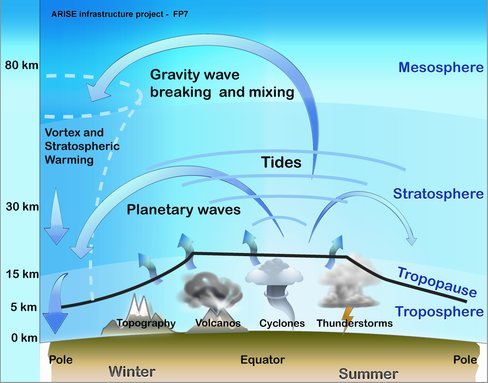
Fuente: http://arise-project.eu/science.php

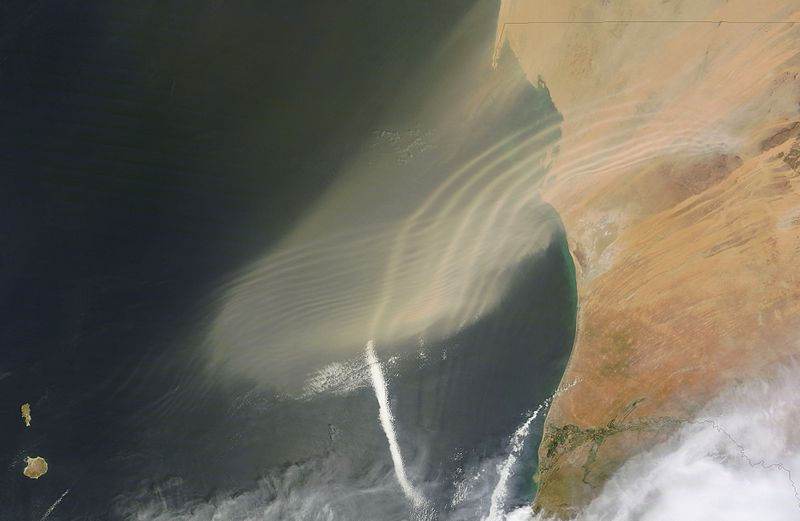  
[Ondas atmosféricas](https://es.wikipedia.org/wiki/Onda_atmosf%C3%A9rica) asociadas a una pequeña tormenta de arena en el noroeste de Africa, 23 setiembre 2011. Imágen del espectroradiómetro MODIS del satélite Terra de la NASA.
Fuente: https://en.wikipedia.org/wiki/Atmospheric_wave

## Ilustración

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.style import use as meGusta
meGusta('fivethirtyeight') # estilo de gráficos con grilla y letras grandes
import ipywidgets as iwy

Quiero
- botón con texto \\(A \cos(k x - \omega t + \phi_0) \\) para activar propagante a derecha
- ídem. para izquierda
- Cuando ambas activas mostrar suma
- Con widget `play` animar todo
- Punto que se desplace con cresta en ambas

In [8]:
# Parámetros
A_max = 0.1 # [m]
L = 20 # [m]
T_base = 3 # [s]
psi_np = sym.lambdify([A, k, x, omega, t, phi_0], psi.rhs, 'numpy')

In [9]:
# estos quiero que se puedan modificar
A_valor = A_max/2
llambda_valor = L/16
k_valor = 2* np.pi/ llambda_valor
omega_valor = 2* np.pi/ T_base
phi_0_valor = 0

In [10]:
t_valor = 0.0
x = np.linspace(0, L, num= 300)
psi_plot = psi_np(A_valor, k_valor, x, omega_valor, t_valor, phi_0_valor)

In [ ]:
T = t_intervalo* cuadros

In [55]:
cuadros

In [56]:
def ondaplt(A, llambda, T, t, phi_0):
    fig = plt.figure(figsize= (12, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_ylim(-1.2* A_max, 1.2* A_max)
    k = 2* np.pi/ llambda
    x = np.linspace(0, L, num= 300)
    omega = 2* np.pi/ T
    ax.plot(x, psi_np(A, k, x, omega, t, phi_0 ) )
    ax.set_ylabel('$\psi$ [m]')
    ax.set_xlabel('x [m]')

In [57]:
from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='jshtml')

In [81]:
# inicialización figura
figuraAnimación = plt.figure(figsize= (12, 4))
figuraAnimación.tight_layout()
ax = figuraAnimación.add_axes([0, 0, 1, 1])
ax.set_ylim(-1.2* A_max, 1.2* A_max)
ax.set_xlim(0, L)
ax.set_ylabel('$\psi$ [m]')
ax.set_xlabel('x [m]')

# tiempo en la animación
t_intervalo = 1000/24 # [ms] se ven bien las animaciones así (24 fps, PAL)
cuadros = int(1000* (T_base/t_intervalo) + 1) # un período de animación, el 1 adicional es porque contamos de 0
t_array = np.arange(0, cuadros*(t_intervalo/1000.0) , (t_intervalo/1000.0) ) # No se necesita generarle en cada iteración como y

line, = ax.plot([], [])
def inicialización():
    line.set_data([], []) # borra todo
    return line,

def cuadroAnimación(i):
    psi_cuadro = psi_np(A_valor, k_valor, x, omega_valor, t_array[i], phi_0_valor)
    line.set_data(x, psi_cuadro)
    return line,

animaciónPropagantePositiva = animation.FuncAnimation(figuraAnimación, cuadroAnimación, init_func= inicialización,
                               frames= cuadros, interval= t_intervalo, blit=True) # no sería posible sin iterable/blit
plt.close()

In [82]:
animaciónPropagantePositiva

In [86]:
# Primero declarar widgets
A_widget = iwy.widgets.FloatSlider( value= A_max/2, min= A_max/10, max= A_max, step= A_max/10, description='A [m]')
llambda_widget = iwy.widgets.FloatSlider( value= L/16, min= L/32, max= L/8, step= L/64, description='$\lambda$ [m]')
T_widget = iwy.widgets.FloatSlider( value= 3.0* T_base, min= 0.1* T_base, max= 6.0* T_base, step=0.2* T_base, description= 'T [s]')
# t_widget = iwy.widgets.FloatSlider( value= 0.0, min= -T_base, max= T_base, step= T_base/10, description='t [s]')
phi_0_widget = iwy.widgets.FloatSlider( value= 0, min= -np.pi, max= np.pi, step= np.pi/8, description='$\phi_0$ [rad]')
#iwy.VBox([A_widget, llambda_widget, T_widget, phi_0_widget ] )

Quiero todos en un array tras presionar un botón

In [87]:
def retornaParámetrosPropagante(A_max, llambda, T, A, x, phi_0):
    return [A_max, llambda, T, A, x, phi_0]
ouk = iwy.interact_manual(retornaParámetrosPropagante, A_max = A_max, llambda= llambda_widget, T= T_widget, A= A_widget, x= x, t= jouer_widget, phi_0= phi_0_widget)

interactive(children=(FloatSlider(value=0.1, description='A_max', max=0.30000000000000004, min=-0.1), FloatSli…

<function __main__.retornaParámetrosPropagante(A_max, llambda, T, A, x, phi_0)>

In [13]:
def ondaplt(A, llambda, T, t, phi_0):
    fig = plt.figure(figsize= (12, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_ylim(-1.2* A_max, 1.2* A_max)
    k = 2* np.pi/ llambda
    x = np.linspace(0, L, num= 300)
    omega = 2* np.pi/ T
    ax.plot(x, psi_np(A, k, x, omega, t, phi_0 ) )
    ax.set_ylabel('$\psi$ [m]')
    ax.set_xlabel('x [m]')

In [70]:
t[1]

In [73]:
i= 1
# psi_np(A, k, x, omega, t[i], phi_0)
A_val = 

SyntaxError: can't assign to literal (<lambdifygenerated-5>, line 2)

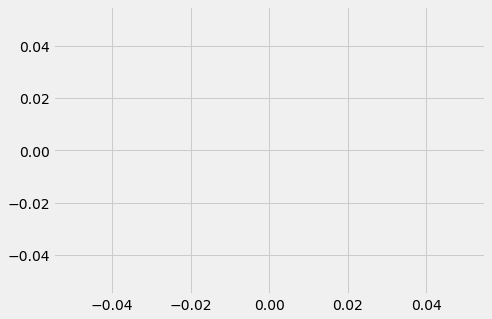

In [61]:
# fig = plt.figure()
# ax = plt.axes()
figuraAnimación = plt.figure()
ax = figuraAnimación.add_axes([0,0,1,1]) # agrega ejes como atributo de la figura

line, = ax.plot([], [])
def init():
    line.set_data([], []) # borra todo
    return line,

# Parámetros
A_max = 0.1 # [m]
L = 20 # [m]
T_base = 3 # [s]
psi_np = sym.lambdify([A, k, x, omega, t, phi_0], psi.rhs, 'numpy')
llambda = L/16
k = 2* np.pi/ llambda
x = np.linspace(0, L, num= 300)
omega = 2* np.pi/ T
ax.set_xlim(0, L)
ax.set_ylim(-1.2* A_max, 1.2* A_max)
psi_np(A, k, x, omega, t, phi_0)
t_intervalo = 20 # [ms]
cuadros = 50
t = np.linspace(0, 4, 1000* t_intervalo) # No se necesita generarle en cada iteración como y


def animate(i):
    psi_i = psi_np(A, k, x, omega, t(i), phi_0)
    #     y = np.sin(2 * np.pi * (t - 0.01 * i)) # dibuja cada uno
    line.set_data(t, psi)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames= cuadros, interval= t_intervalo, blit=True) # no sería posible sin iterable/blit
plt.close()

In [57]:
anim

TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable cos method

In [19]:
delta_t = 0.1 # [s]
iwy.interact_manual(ondaplt, A_max = A_max, llambda= llambda_widget, T= T_widget, A= A_widget, x= x, t= jouer_widget, phi_0= phi_0_widget)

interactive(children=(FloatSlider(value=0.05, description='A [m]', max=0.1, min=0.01, step=0.01), FloatSlider(…

<function __main__.ondaplt(A, llambda, T, t, phi_0)>